# Clustering

Start learning clustering
--
clustering use 
* silhuette score
* kmeans
* elbow method
* hierarchical clustering
* DBSCAN

## import libraries

In [36]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [37]:
df = pd.read_excel('cars.xls')

In [38]:
## EDA - Exploratory Data Analysis

In [39]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,True
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,False
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,True
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,False
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,True


In [40]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,aa
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,False
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,True
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,False
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0,True
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0,False


In [41]:
x = df[['Price', 'Mileage', 'Cylinder']]
x

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6
...,...,...,...
799,16507.070267,16229,6
800,16175.957604,19095,6
801,15731.132897,20484,6
802,15118.893228,25979,6


In [42]:
## modeling

In [43]:
model = KMeans(n_clusters=4)
model.fit(x)

KMeans(n_clusters=4)

In [44]:
pred = model.predict(x)
pred

array([3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 2, 0,
       0, 2, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [45]:
x['cluster'] = pred
x

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,3
1,17542.036083,9135,6,3
2,16218.847862,13196,6,3
3,16336.913140,16342,6,3
4,16339.170324,19832,6,0
...,...,...,...,...
799,16507.070267,16229,6,3
800,16175.957604,19095,6,0
801,15731.132897,20484,6,0
802,15118.893228,25979,6,0


Text(0, 0.5, 'Mileage')

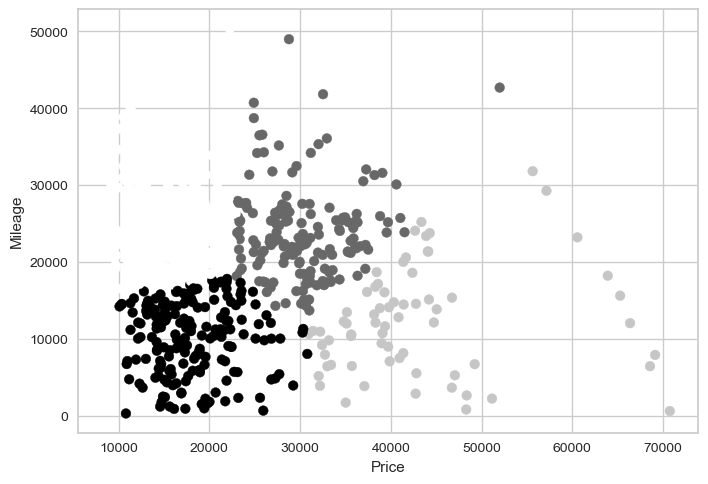

In [46]:
plt.scatter(x['Price'], x['Mileage'], c=x['cluster'])
plt.xlabel('Price')
plt.ylabel('Mileage')

In [47]:
silhouette_score(x, pred)

0.41420521772033303

In [48]:
## find the best k value

k=2, silhouette=0.4511454147916874
k=3, silhouette=0.4132108736577193
k=4, silhouette=0.413286104382977
k=5, silhouette=0.3549031739338048
k=6, silhouette=0.3604493462843469
k=7, silhouette=0.3603062397631337
k=8, silhouette=0.36273589561182884
k=9, silhouette=0.3492586180227883


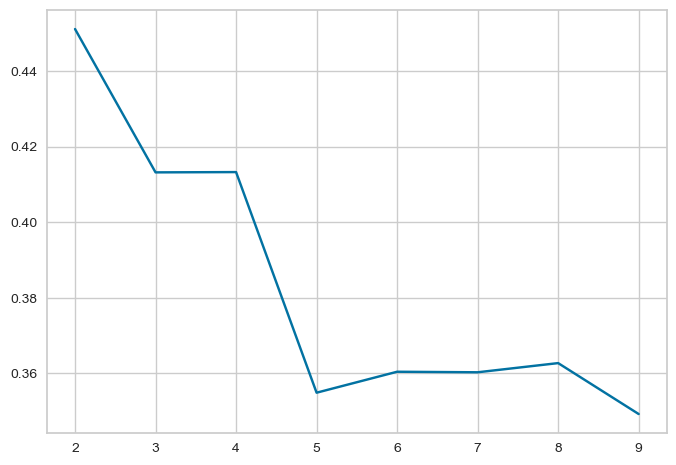

In [49]:
k_list = []
silhouette_list = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(x)
    pred = model.predict(x)
    silhouette = silhouette_score(x, pred)
    k_list.append(k)
    silhouette_list.append(silhouette)
    print(f'k={k}, silhouette={silhouette}')

plt.plot(k_list, silhouette_list)


In [50]:
# elbow method


<Axes: >

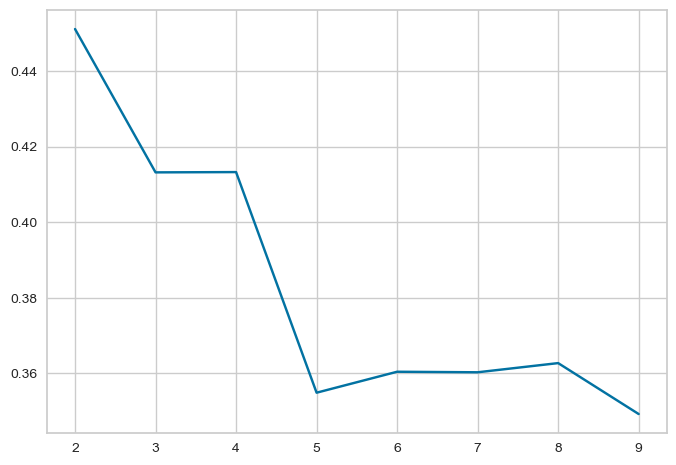

In [51]:
sns.lineplot(x=k_list, y=silhouette_list)

<Axes: >

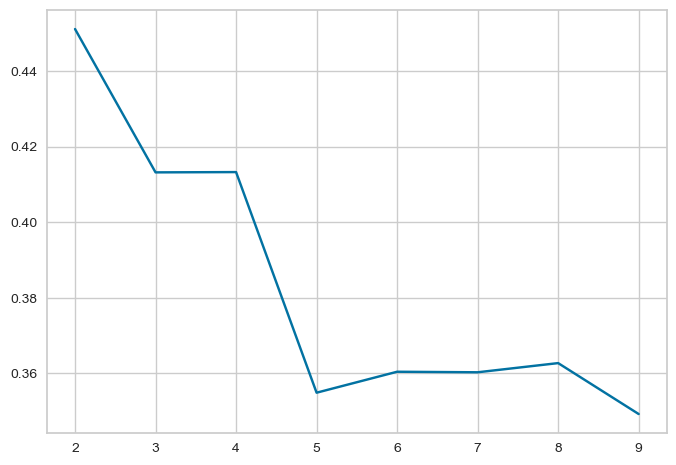

In [52]:
sns.lineplot(x = range(2, 10), y = silhouette_list)

In [53]:
#pip install yellowbrick

In [54]:
from yellowbrick.cluster import KElbowVisualizer

In [55]:
km = KMeans()

In [56]:
visualizer = KElbowVisualizer(km, k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

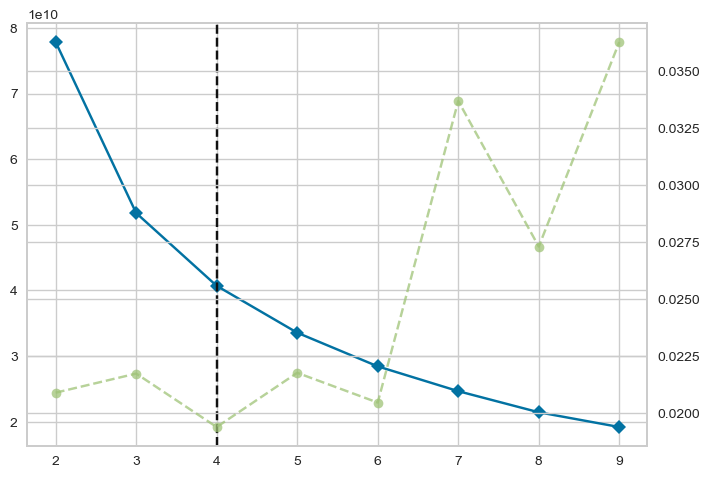

In [57]:
visualizer.fit(x)

In [58]:
visualizer.poof()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# hierarchical clustering

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [65]:
hc = linkage(x, 'ward', metric='euclidean')

In [68]:
plt.figure(figsize=(25, 6))

<Figure size 2500x600 with 0 Axes>

<Figure size 2500x600 with 0 Axes>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [42.5, 42.5, 70.0, 70.0],
  [25.0, 25.0, 56.25, 56.25],
  [10.0, 10.0, 40.625, 40.625],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [106.25, 106.25, 142.5, 142.5],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [172.5, 172.5, 217.5, 217.5],
  [124.375, 124.375, 195.0, 195.0],
  [25.3125, 25.3125, 159.6875, 159.6875],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [345.0, 34

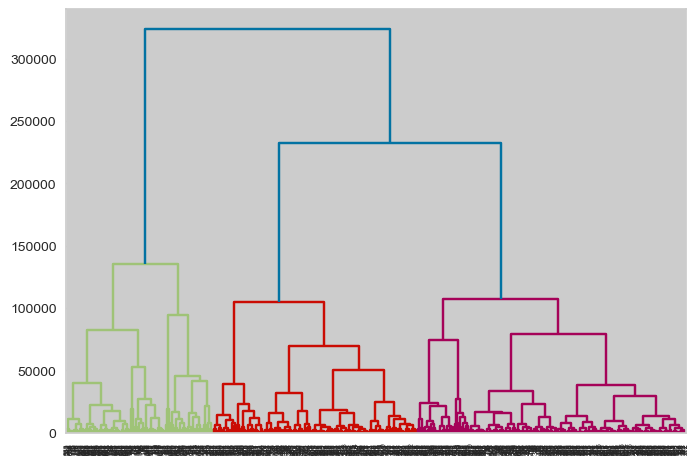

In [69]:
dendrogram(hc)

In [71]:

# load billionaires dataset
df = pd.read_csv('Billionaires.csv')


In [72]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [73]:
df.tail()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2639,2540,1000,Diversified,Inigo Zobel,66.0,Philippines,Makati,Diversified,Diversified,Philippines,...,2.5,"$376,795,508,680",35.5,107.5,71.1,14.0,43.1,1.081166e+08,12.879721,121.774017


<Axes: xlabel='selfMade', ylabel='count'>

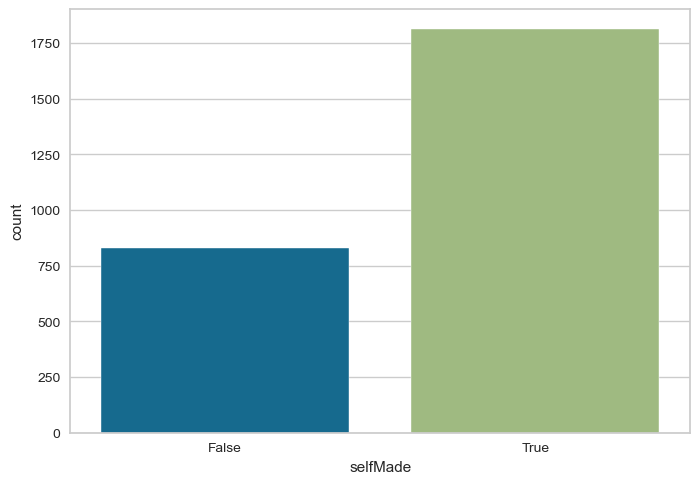

In [74]:
sns.countplot(x= df.selfMade)

<Axes: xlabel='count', ylabel='country'>

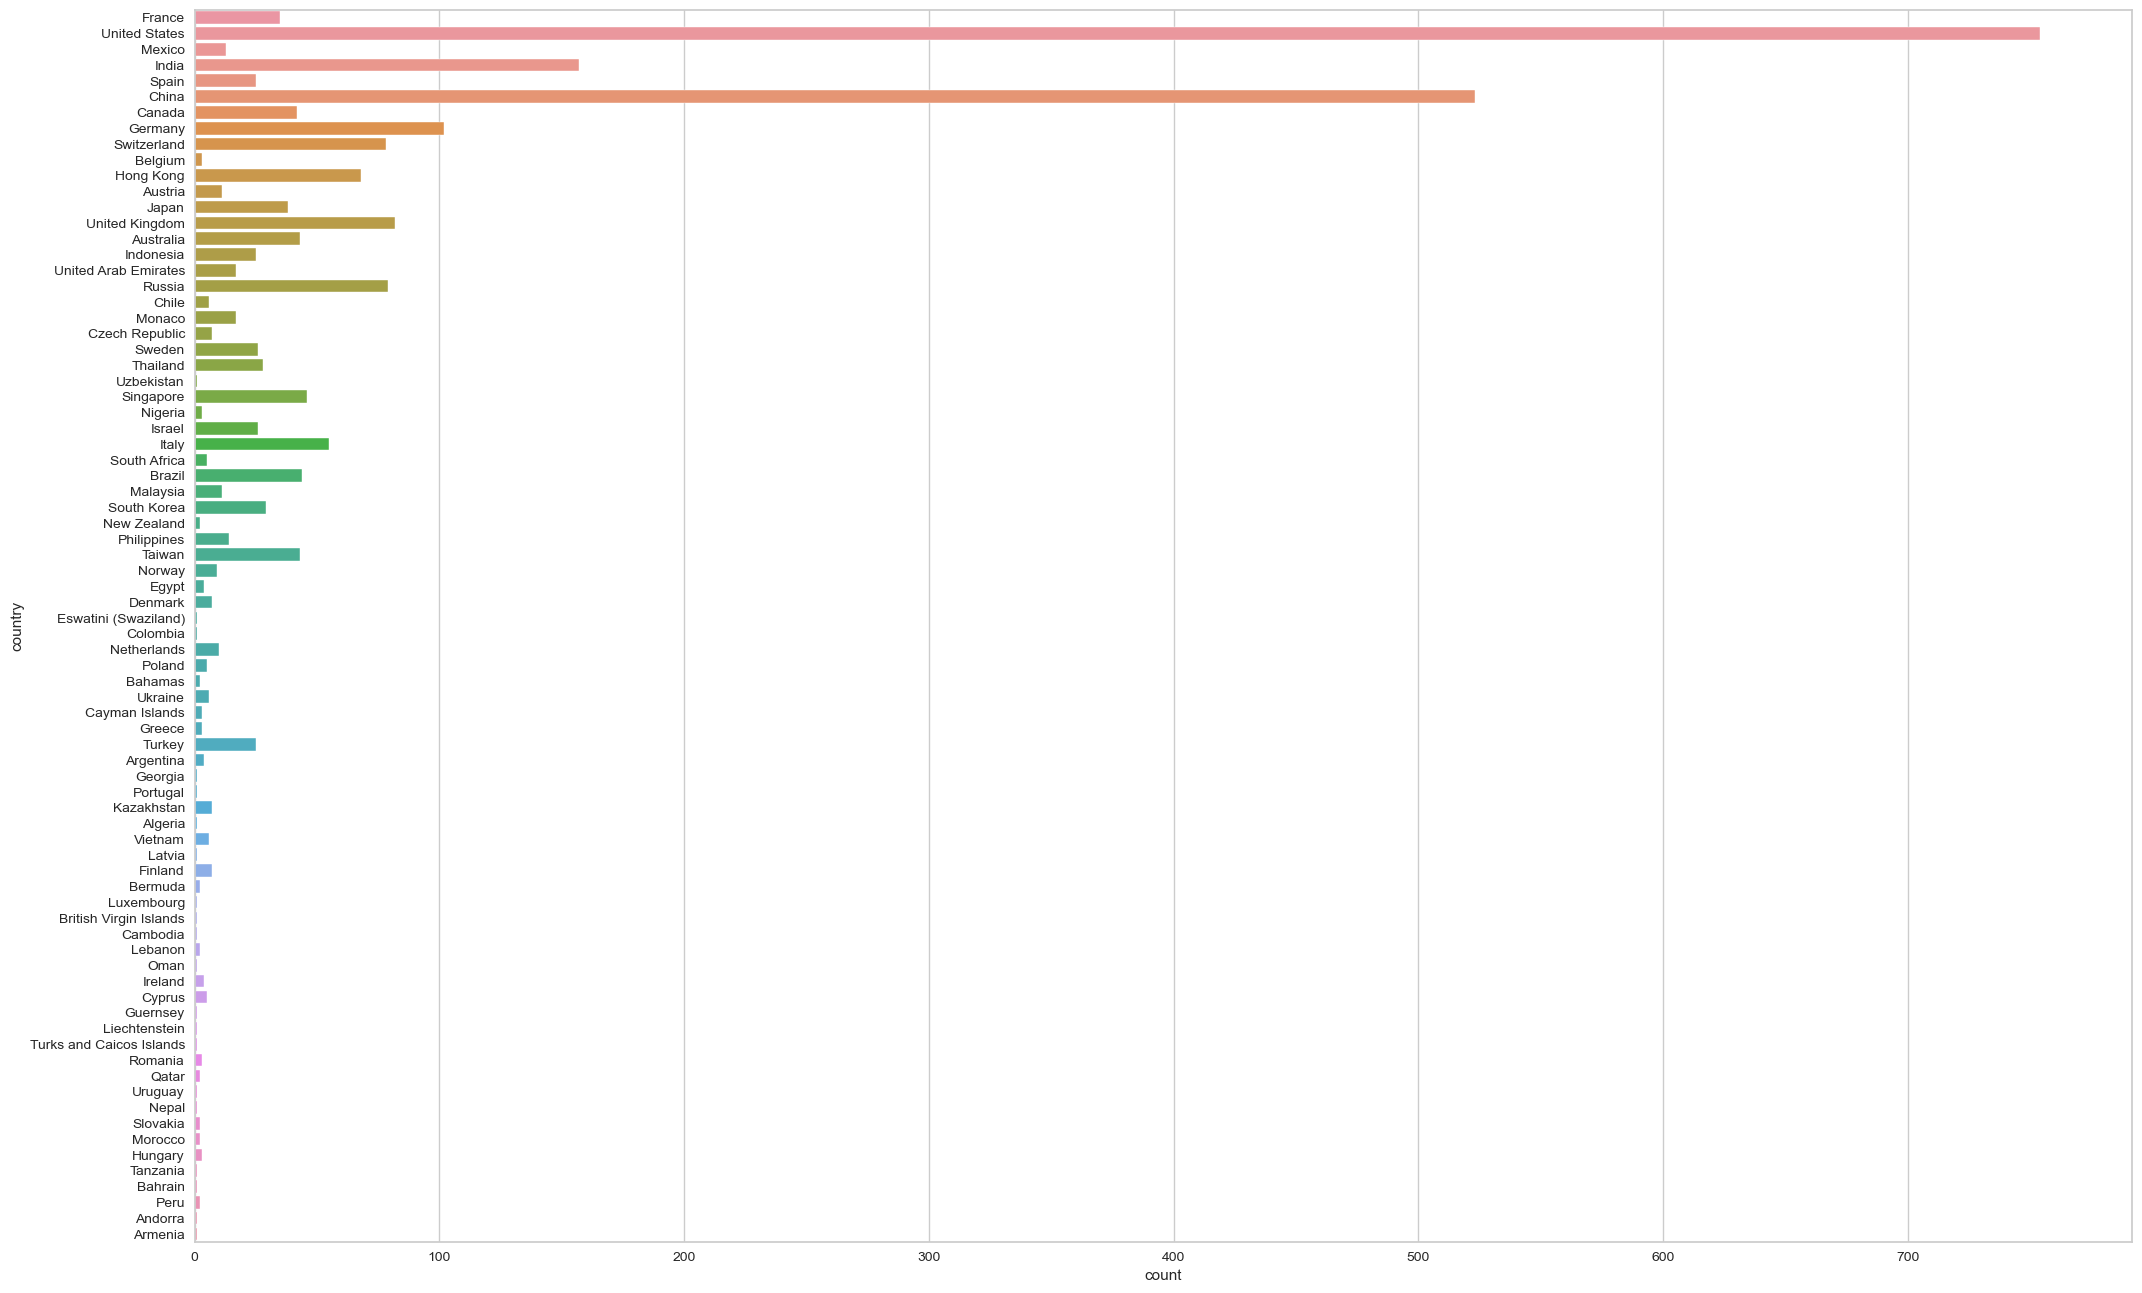

In [78]:
plt.figure(figsize=(25, 16))
sns.countplot(y= df.country)

In [79]:
import numpy as np
np.where(df.country == 'Turkey')

(array([ 498,  548,  582,  982, 1042, 1128, 1242, 1256, 1326, 1349, 1370,
        1594, 1595, 1634, 1692, 1756, 1906, 1917, 2159, 2224, 2264, 2282,
        2466, 2560, 2622]),)

<Axes: xlabel='count', ylabel='country'>

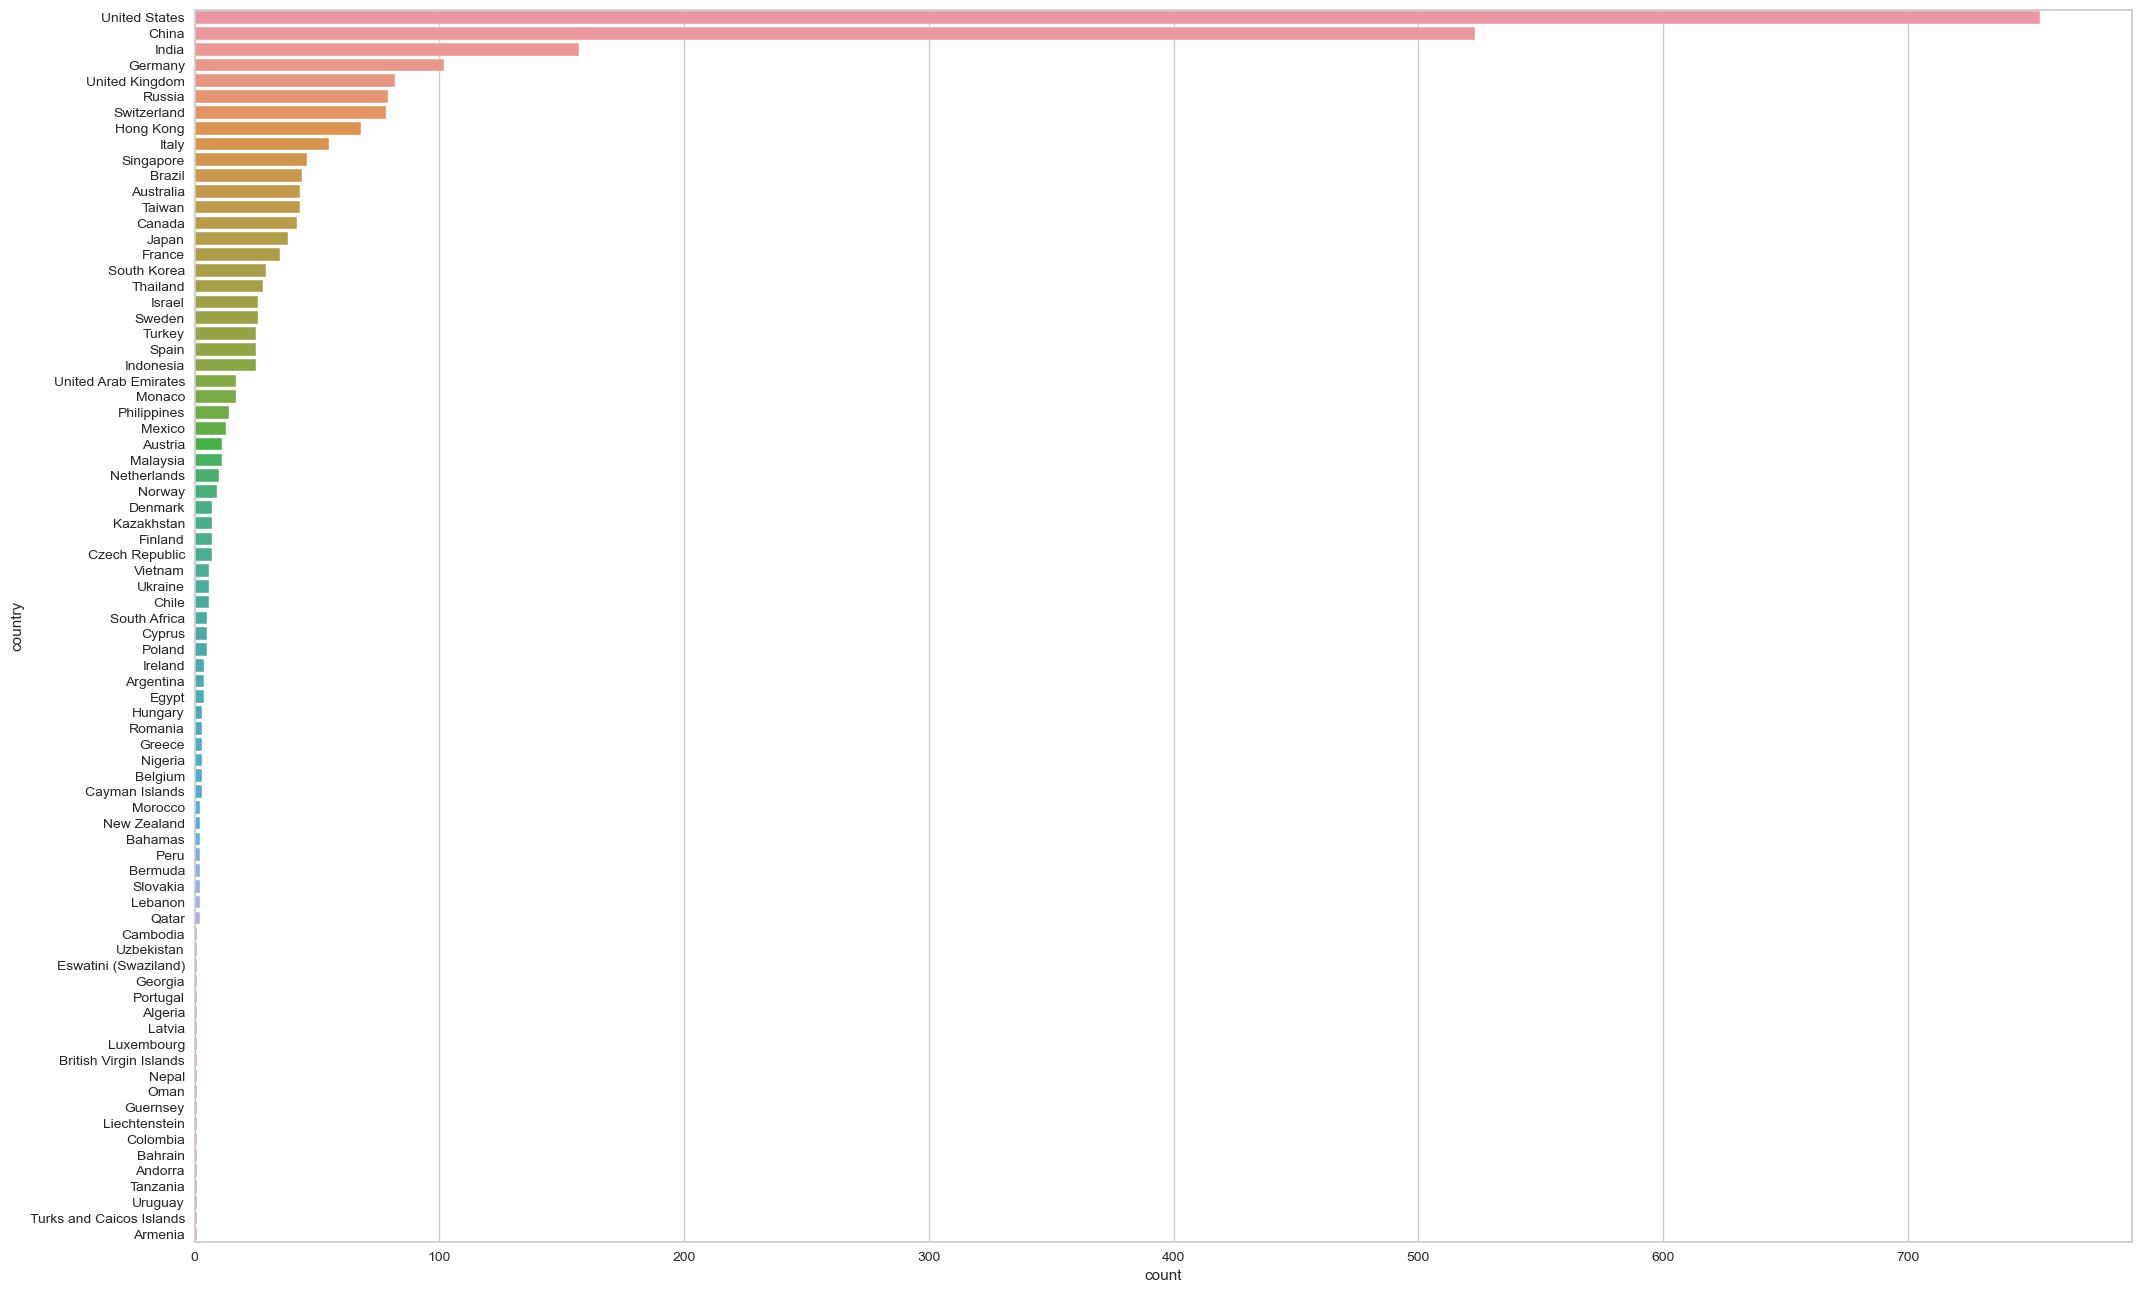

In [80]:
sorter_df = df.country.value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 16))
sns.countplot(y= df.country, order=sorter_df.index)

<Axes: xlabel='category', ylabel='finalWorth'>

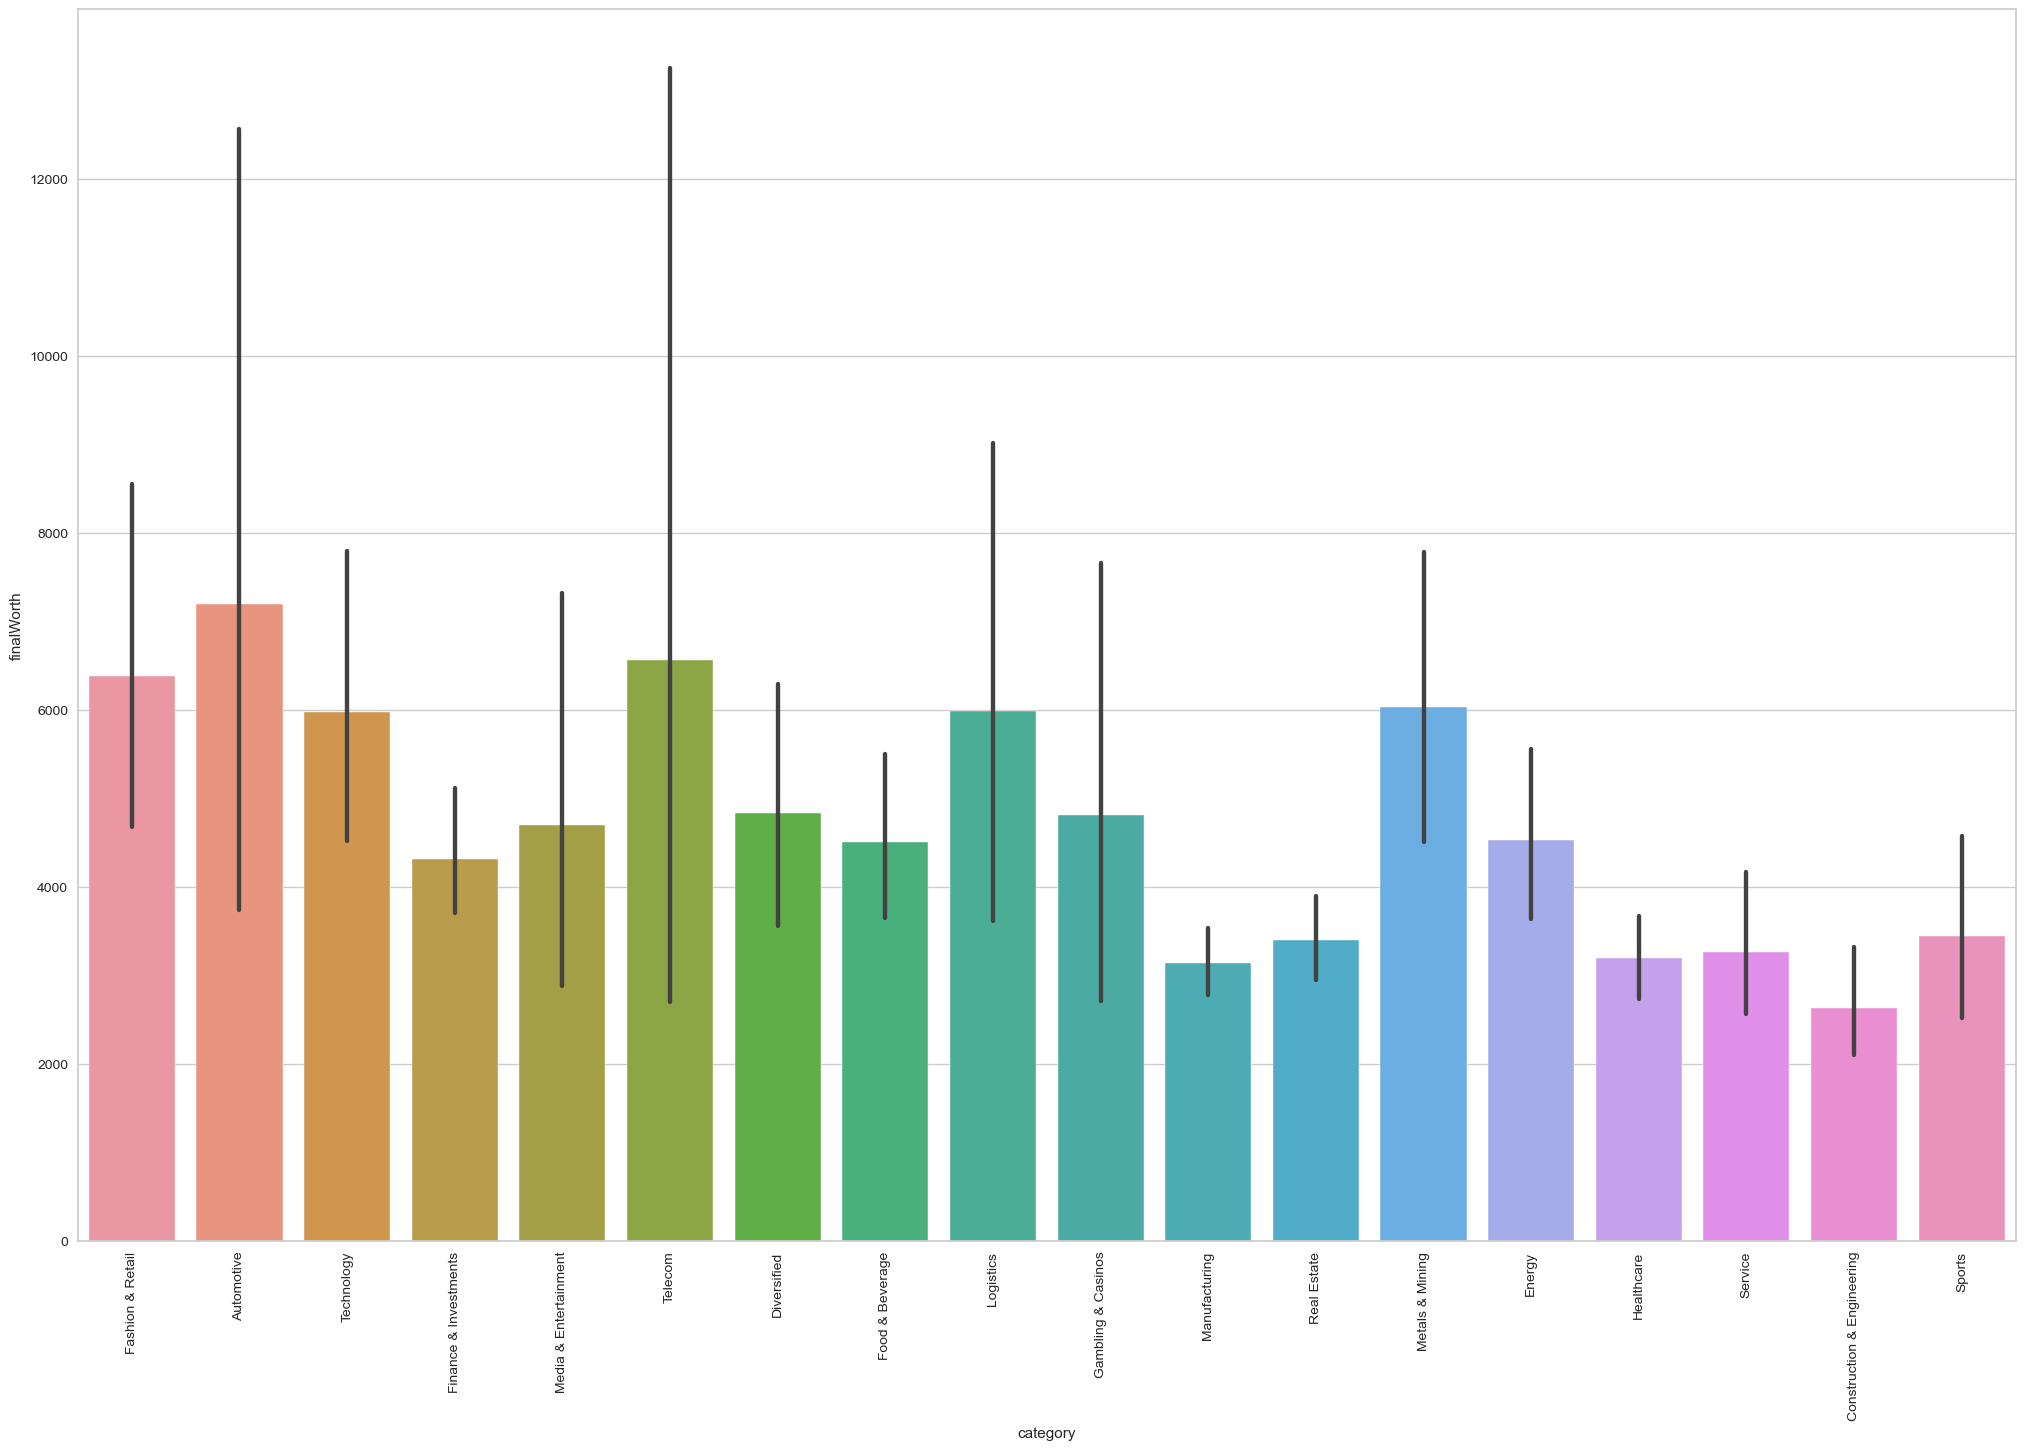

In [95]:
plt.figure(figsize=(25, 16))
plt.xticks(rotation=90)
sns.barplot(x = df.category, y = df.finalWorth)

In [84]:
tr_df =df[df.country == 'Turkey']


<Axes: xlabel='selfMade', ylabel='count'>

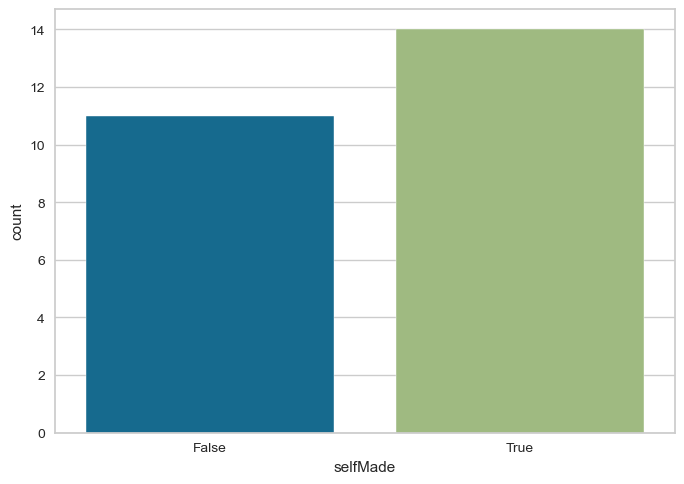

In [87]:
sns.countplot(x= tr_df.selfMade)

<Axes: xlabel='personName', ylabel='finalWorth'>

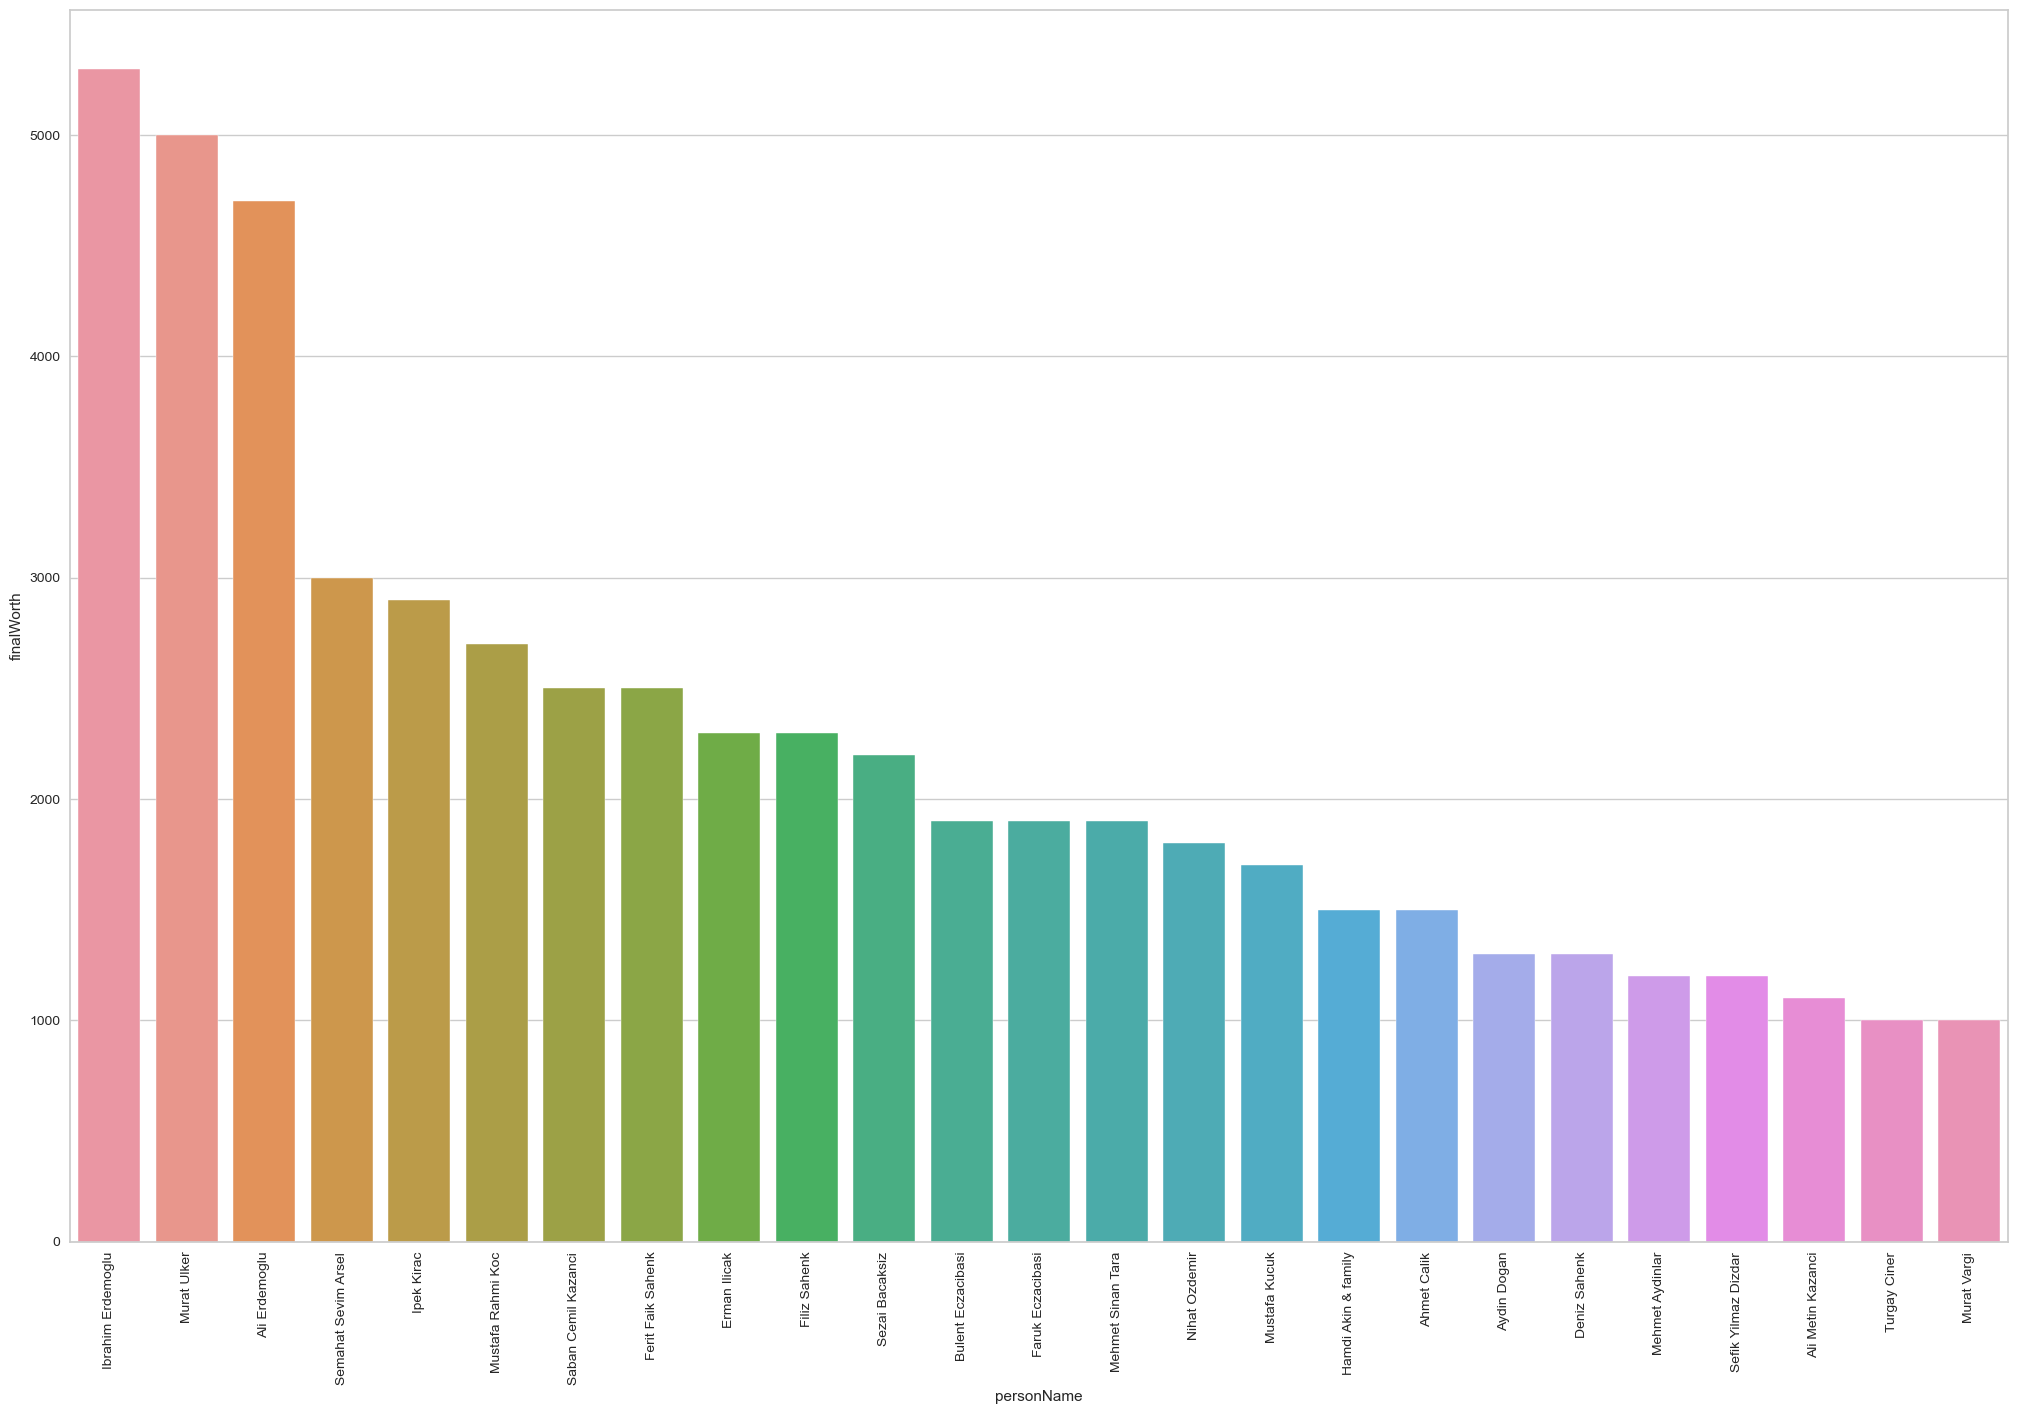

In [89]:
plt.figure(figsize=(25, 16))
plt.xticks(rotation=90)
sns.barplot(x = tr_df.personName, y = tr_df.finalWorth)

<Axes: xlabel='category', ylabel='finalWorth'>

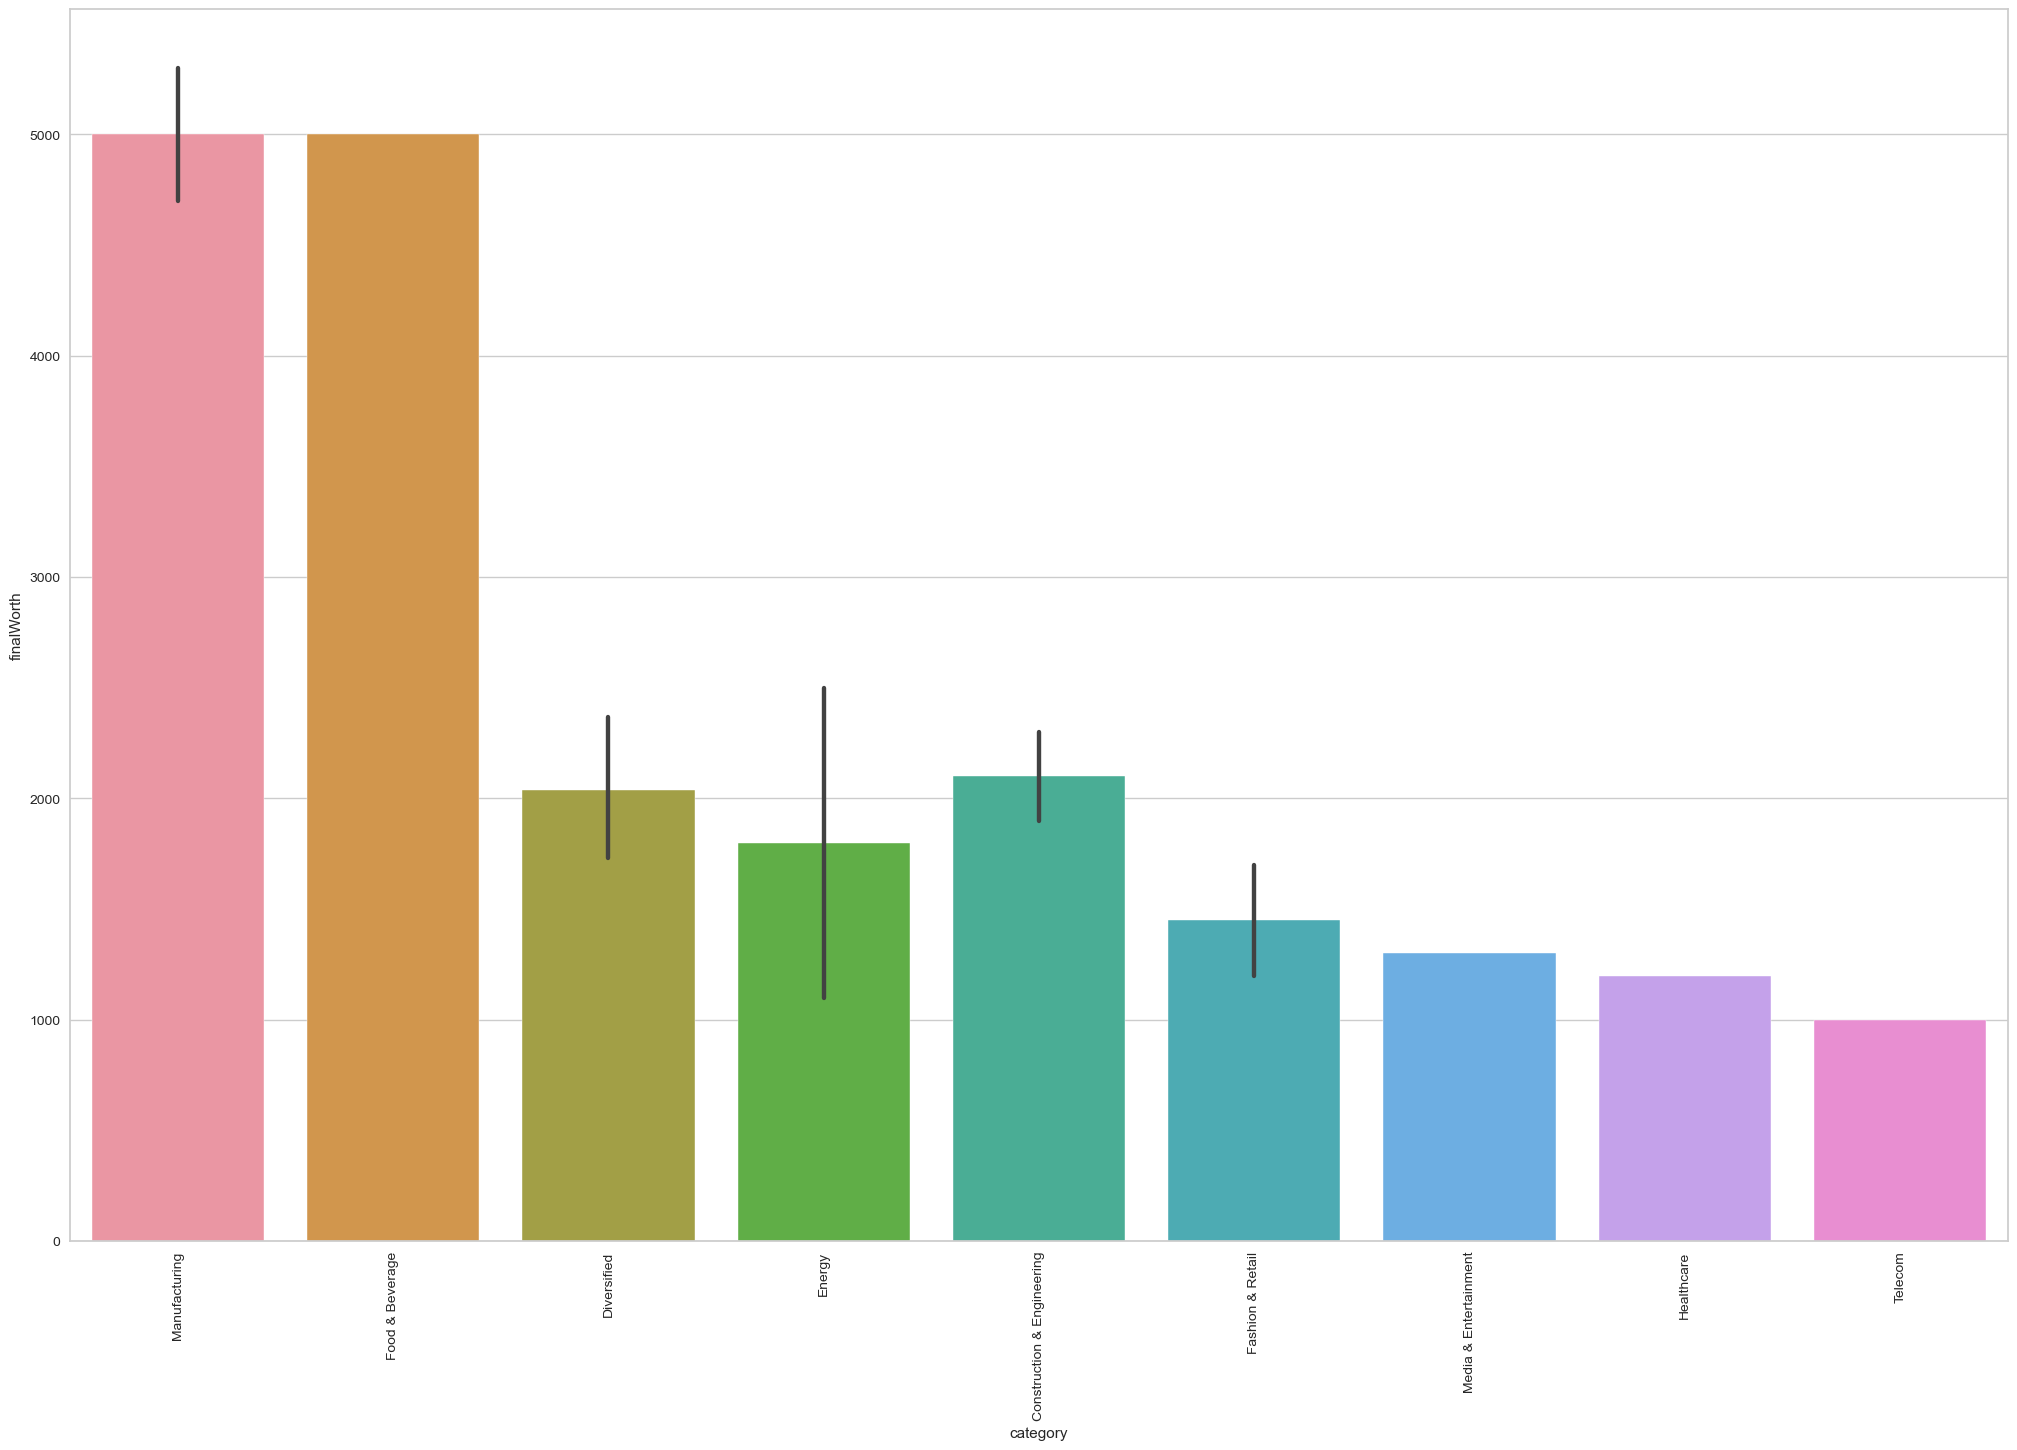

In [92]:
## sns sector
plt.figure(figsize=(25, 16))
plt.xticks(rotation=90)
sns.barplot(x = tr_df.category, y = tr_df.finalWorth)

<Axes: xlabel='gender', ylabel='count'>

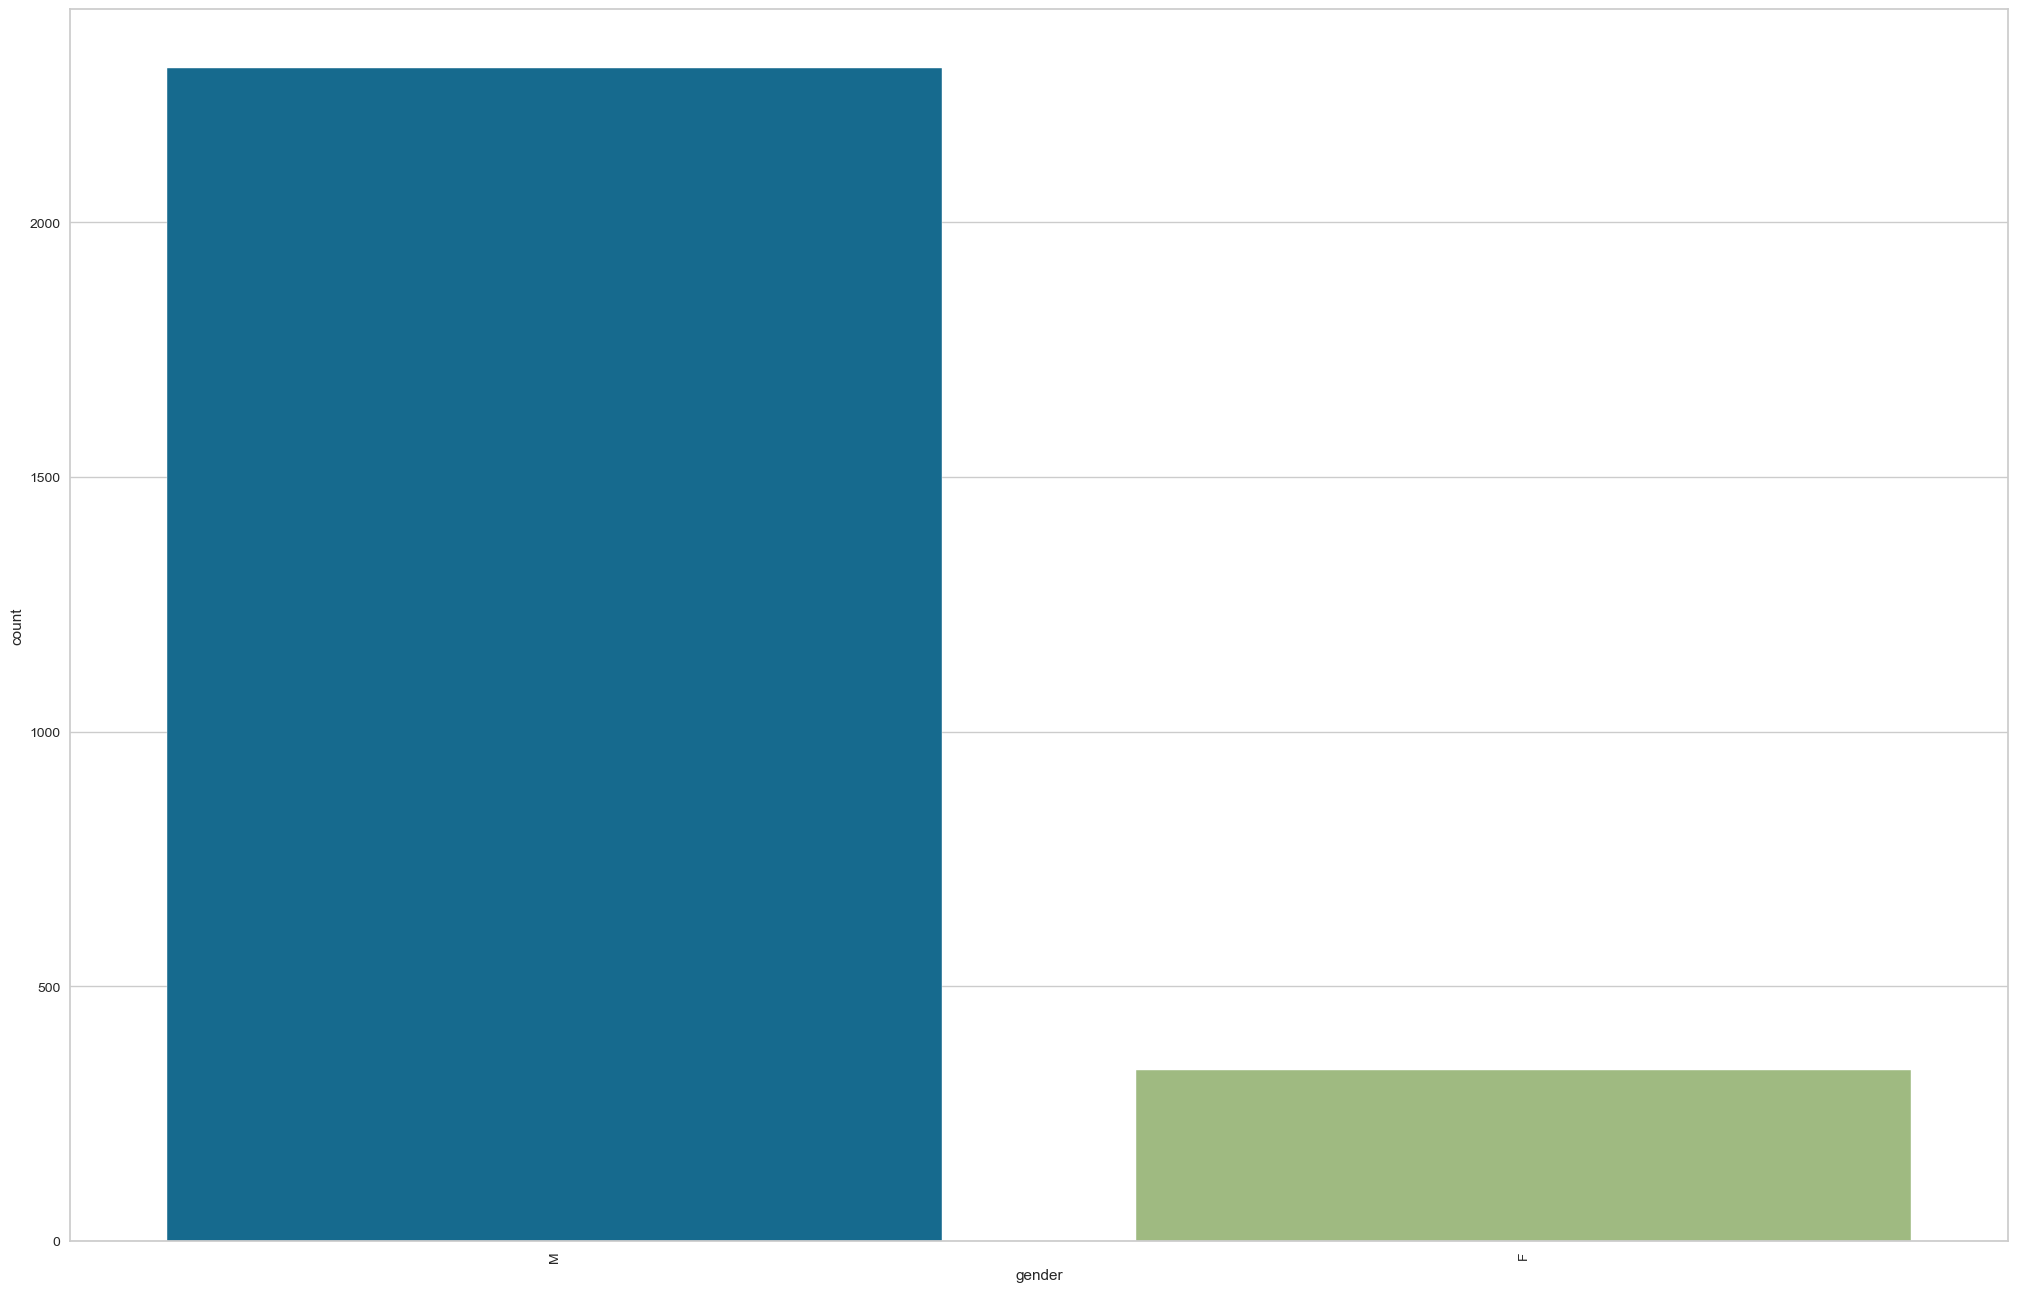

In [96]:
plt.figure(figsize=(25, 16))
plt.xticks(rotation=90)
sns.countplot(x = df.gender)